<a href="https://colab.research.google.com/github/bagasap10/COMP6577-MachineLearning/blob/main/MLWeek10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
!wget https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv

--2021-06-02 07:00:43--  https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3858 (3.8K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.77K  --.-KB/s    in 0s      

2021-06-02 07:00:43 (56.7 MB/s) - ‘iris.csv’ saved [3858/3858]



In [5]:
dataIris = pd.read_csv("iris.csv")

for i in dataIris:
  print(i, dataIris[i].dtypes)
  if dataIris[i].isna().values.any() and dataIris[i].dtypes != object:
      dataIris[i] = dataIris[i].fillna(dataIris[i].mean())


sepal_length float64
sepal_width float64
petal_length float64
petal_width float64
species object


In [4]:
dataIris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


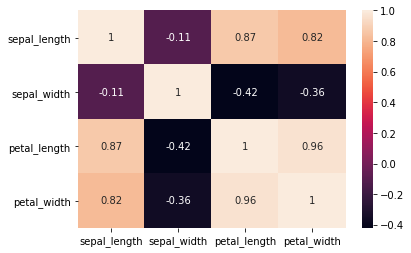

In [17]:
sns.heatmap(data = dataIris.corr(), annot = True)
plt.show

X = dataIris[["sepal_length", "sepal_width","petal_length","petal_width"]]
Y = dataIris["species"]

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size = 0.2)

# **Classification - KNN**

In [33]:
Ks = 20
trainAccuracy = np.zeros((Ks-1))
testAccuracy = np.zeros((Ks-1))
ConfustionMx = [];

for n in range(1, Ks):    
    KNN = KNeighborsClassifier(n_neighbors = 3).fit(XTrain, YTrain)  
    trainClass = KNN.predict(XTrain)
    testClass = KNN.predict(XTest)
    trainAcc = metrics.accuracy_score(YTrain, trainClass)
    testAcc = metrics.accuracy_score(YTest, testClass)

    
print("Best Train ACC : %.2f" % trainAcc.max(), ", with k = ", trainAcc.argmax() + 1)
print("Best Test ACC : %.2f" % testAcc.max(), ", with k = ", testAcc.argmax() + 1)

Best Train ACC : 0.95 , with k =  1
Best Test ACC : 1.00 , with k =  1


# **Classification - Logistic Regression**

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [23]:
LGR = LogisticRegression(C = 1.00, solver = 'liblinear').fit(XTrain, YTrain)

trainClass = LGR.predict(XTrain)
testClass = LGR.predict(XTest)

print("Train accuracy : ", metrics.accuracy_score(YTrain, trainClass))
print("Test accuracy  : ", metrics.accuracy_score(YTest, testClass))

Train accuracy :  0.9666666666666667
Test accuracy  :  0.8666666666666667


# **Classification - Decision Tree**

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
DST = DecisionTreeClassifier(criterion="gini", max_depth = 10).fit(XTrain, YTrain)

print("Train dataset")
trainClass = DST.predict(XTrain)
trainAcc = metrics.accuracy_score(YTrain, trainClass)
trainF1  = f1_score(YTrain, trainClass, average='weighted')

print(" ACC : %.2f" % trainAcc)
print(" F1  : %.2f" % trainF1)

print("")
print("Test dataset")
testClass = DST.predict(XTest)
testAcc  = metrics.accuracy_score(YTest, testClass)
testF1  = f1_score(YTest, testClass, average='weighted')

print(" ACC : %.2f" % testAcc)
print(" F1  : %.2f" % testF1)


Train dataset
 ACC : 1.00
 F1  : 1.00

Test dataset
 ACC : 0.93
 F1  : 0.93


# **Classification - SVM**

In [30]:
from sklearn import svm

In [31]:
SVM = svm.SVC().fit(XTrain, YTrain)

print("Train dataset")
trainClass = SVM.predict(XTrain)
trainAcc = metrics.accuracy_score(YTrain, trainClass)
trainF1  = f1_score(YTrain, trainClass, average='weighted')

print(" ACC : %.2f" % trainAcc)
print(" F1  : %.2f" % trainF1)

print("")
print("Test dataset")
testClass = SVM.predict(XTest)
testAcc  = metrics.accuracy_score(YTest, testClass)
testF1  = f1_score(YTest, testClass, average='weighted')

print(" ACC : %.2f" % testAcc)
print(" F1  : %.2f" % testF1)

Train dataset
 ACC : 0.97
 F1  : 0.97

Test dataset
 ACC : 1.00
 F1  : 1.00


# **Conclusion**

After conducting a classification on Iris dataset, I can conclude that:

1.   KNN have good accuracy because there is no training phase. This is simple yet effective wayof classifying data. KNN categorize data based on their distance to other points in a training dataset.
Disadvantage of this model is it can be fooled by irrelevant attributes that stacked obscure important attributes.

2.   Logistic Regression is using logistic funtion to describe the possible outcomes of a single trial.
Disadvantage of this model is it works only when the predicted variable is binary.

3.   Decision tree are quick and easy to follow. Classification trees give response that are nominal, such as true or false.
Disadvantage of this model is that they tend to overfit.

4.   SVM classifies data by finding the best hyperplane that separates all data points of one class from those of the other class. It is extremely accurate but have a longer time if using a model with more than two classes.


